In [22]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from adjustText import adjust_text
import scipy.stats as stats

# 1. Se cargan el conjunto de datos

In [23]:
# Define la ruta base del proyecto (la raíz del proyecto)
# Esto asume que el notebook está en la carpeta notebooks

BASE_PATH = os.path.abspath('..')  # Esto asume que el notebook está en la carpeta notebooks

RAW_DATA_PATH = os.path.join(BASE_PATH, 'data', 'raw')
PROCESSED_DATA_PATH = os.path.join(BASE_PATH, 'data', 'processed')

FILE_NAME = 'bank-additional-full.csv'
FILE_NAME_PROCESSED = 'bank-additional-full-Processed-bi.csv'

# Carga un archivo CSV de la carpeta raw (como ejemplo)
CSV_FILE = os.path.join(RAW_DATA_PATH, FILE_NAME)

data = pd.read_csv(CSV_FILE, sep=';')

# Muestra las primeras filas para confirmar que los datos se cargaron correctamente
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 2. Normalizar el nombre de las columnas y clases de categorias

In [24]:
data.columns = data.columns.str.lower().str.replace(r'\W+', '_', regex=True)

In [25]:
data_categorical = data.select_dtypes(include=['category', 'object'])
categorical_columns = list(data_categorical.columns)

data_numerical = data.select_dtypes(include=['int64', 'float64'])
numerical_columns = list(data_numerical.columns)

In [26]:
for col in categorical_columns:
    # Convertir a minúsculas y reemplazar signos de puntuación con '_'
    data[col] = data[col].str.lower().str.replace(r'\W+', '_', regex=True)

data.loc[:, 'job'] = data['job'].str.rstrip('_')

# 3. Tratamiento de Outliers

In [27]:
# Lista para almacenar resultados
outliers_list = []

# Calcular outliers para cada columna numérica
for col in numerical_columns:
    # Calcular Q1 y Q3
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Calcular IQR
    IQR = Q3 - Q1
    
    # Definir los límites de outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar valores atípicos
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    
    # Calcular el número y el porcentaje de outliers
    num_outliers = outliers.count()
    outliers_percentage = (num_outliers / data[col].count()) * 100
    
    # Agregar los resultados a la lista
    outliers_list.append({
        'Variable': col,
        'Num Outliers': num_outliers,
        'Outliers Percentage': outliers_percentage
    })

# Convertir la lista a DataFrame
outliers_summary = pd.DataFrame(outliers_list)

# Mostrar el resumen de outliers
print(outliers_summary)

         Variable  Num Outliers  Outliers Percentage
0             age           469             1.138681
1        duration          2963             7.193843
2        campaign          2406             5.841507
3           pdays          1515             3.678256
4        previous          5625            13.656890
5    emp_var_rate             0             0.000000
6  cons_price_idx             0             0.000000
7   cons_conf_idx           447             1.085268
8       euribor3m             0             0.000000
9     nr_employed             0             0.000000


In [28]:
from scipy.stats.mstats import winsorize

data['duration'] = winsorize(data['duration'], limits=[0.01, 0.02]) 
data['campaign'] = winsorize(data['campaign'], limits=[0.01, 0.02]) 

<Axes: ylabel='Frequency'>

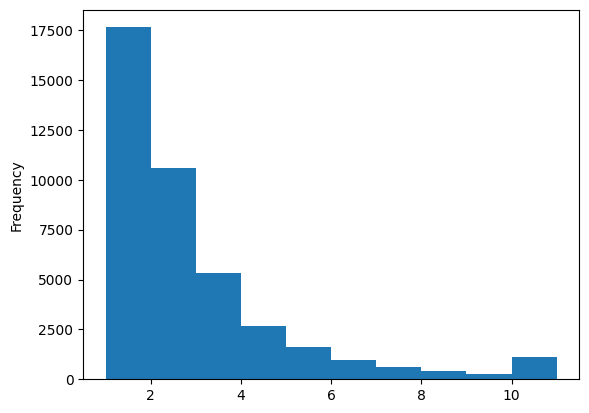

In [29]:
data['campaign'].plot(kind='hist')

<Axes: ylabel='Frequency'>

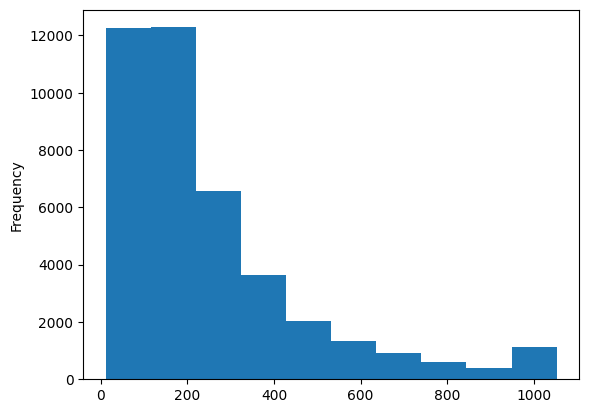

In [30]:
data['duration'].plot(kind='hist')

<Axes: ylabel='Frequency'>

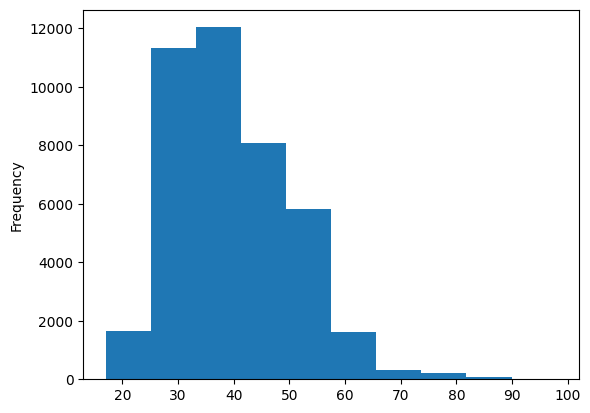

In [31]:
data['age'].plot(kind='hist')

In [32]:
CSV_FILE = os.path.join(PROCESSED_DATA_PATH, FILE_NAME_PROCESSED)
data.to_csv(CSV_FILE, index=None)